In [1]:
import numpy as np
import pandas as pd

In [2]:
customers = pd.read_csv("C:/Users/vasala harinadha/OneDrive/Desktop/Zeotap/Customers.csv")


In [3]:
transactions = pd.read_csv("C:/Users/vasala harinadha/OneDrive/Desktop/Zeotap/Transactions.csv")


## Load and Explore Datasets

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the datasets on 'CustomerID'
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")

# Feature engineering for transactions
transaction_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
}).reset_index()

# Add customer profile features (e.g., Age, Gender, Region)
customer_summary = pd.merge(transaction_summary, customers[['CustomerID', 'Region']], on="CustomerID", how="left")

# Standardize the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[['TotalValue', 'Quantity', 'Price']])


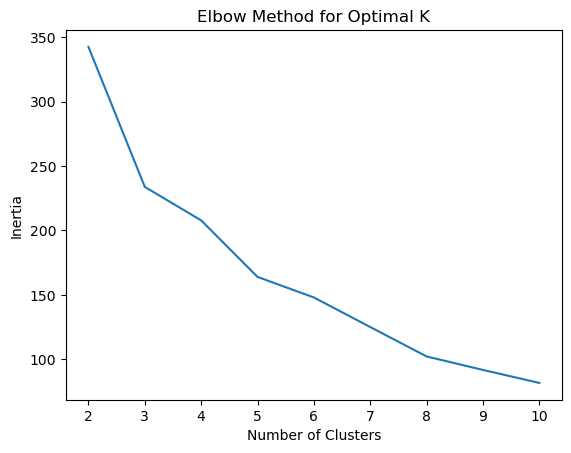

DB Index: 1.12180191226693


In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

# Use the Elbow method to determine optimal clusters (between 2 and 10)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal k (e.g., 4 based on elbow plot)
optimal_k = 4

# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
print(f"DB Index: {db_index}")


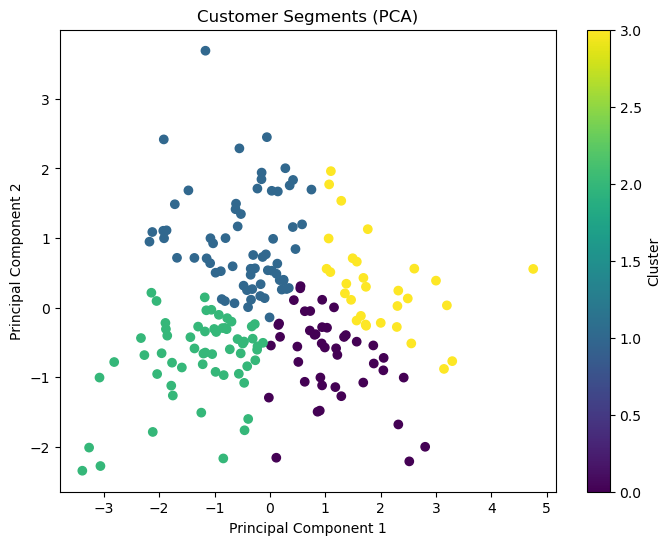

In [20]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization (2D PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=customer_summary['Cluster'], cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## PDF Report

In [26]:
# Text-based report
report = f"""
Customer Segmentation Report
============================

1. Number of Clusters:
   - The clustering model has segmented the customers into {optimal_k} clusters based on transaction and profile data.

2. Davies-Bouldin Index (DB Index):
   - The DB Index value for the clustering model is: {db_index:.4f}. 
     A lower DB Index indicates better clustering quality, as it measures the compactness and separation of the clusters.

3. Other Metrics:
   - You can include any other relevant metrics such as the Silhouette Score here, if calculated.

4. Clustering Visualization:
   - The clusters have been visualized in 2D using PCA (Principal Component Analysis), providing a clear representation of the customer segments.
"""

# Print the report to console
print(report)

# Save the report to a text file
with open('Customer_Segmentation_Report.txt', 'w') as f:
    f.write(report)

print("Text-based report generated: Customer_Segmentation_Report.txt")



Customer Segmentation Report

1. Number of Clusters:
   - The clustering model has segmented the customers into 4 clusters based on transaction and profile data.

2. Davies-Bouldin Index (DB Index):
   - The DB Index value for the clustering model is: 1.1218. 
     A lower DB Index indicates better clustering quality, as it measures the compactness and separation of the clusters.

3. Other Metrics:
   - You can include any other relevant metrics such as the Silhouette Score here, if calculated.

4. Clustering Visualization:
   - The clusters have been visualized in 2D using PCA (Principal Component Analysis), providing a clear representation of the customer segments.

Text-based report generated: Customer_Segmentation_Report.txt


In [24]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Prepare the PDF document
pdf_filename = "report.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

# Add Title
c.setFont("Helvetica-Bold", 16)
c.drawString(50, height - 50, "Customer Segmentation Report")

# Report Content
c.setFont("Helvetica", 12)
c.drawString(50, height - 100, "1. Number of Clusters:")
c.drawString(50, height - 120, f"The clustering model has segmented the customers into {optimal_k} clusters.")
c.drawString(50, height - 140, " ")

c.drawString(50, height - 160, "2. Davies-Bouldin Index (DB Index):")
c.drawString(50, height - 180, f"The DB Index value is: {db_index:.4f}")
c.drawString(50, height - 200, "A lower DB Index indicates better clustering quality.")

c.drawString(50, height - 220, " ")

c.drawString(50, height - 240, "3. Other Metrics:")
c.drawString(50, height - 260, "Include any other relevant metrics, like Silhouette Score, here.")

c.drawString(50, height - 280, " ")

c.drawString(50, height - 300, "4. Clustering Visualization:")
c.drawString(50, height - 320, "Clusters have been visualized using PCA for a 2D representation.")

# Save the PDF
c.save()

print(f"PDF report generated: {pdf_filename}")


PDF report generated: report.pdf


In [27]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Prepare the PDF document
pdf_filename = "report.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter

# Add Title
c.setFont("Helvetica-Bold", 16)
c.drawString(50, height - 50, "Customer Segmentation Report")

# Report Content
c.setFont("Helvetica", 12)

# Number of Clusters
c.drawString(50, height - 100, "1. Number of Clusters:")
c.drawString(50, height - 120, f"The clustering model has segmented the customers into {optimal_k} clusters.")
c.drawString(50, height - 140, " ")

# Davies-Bouldin Index (DB Index)
c.drawString(50, height - 160, "2. Davies-Bouldin Index (DB Index):")
c.drawString(50, height - 180, f"The DB Index value is: {db_index:.4f}")
c.drawString(50, height - 200, "A lower DB Index indicates better clustering quality.")

# Other Metrics
c.drawString(50, height - 220, " ")
c.drawString(50, height - 240, "3. Other Metrics:")
c.drawString(50, height - 260, "Include any other relevant metrics, like Silhouette Score, here.")

# Clustering Visualization
c.drawString(50, height - 280, " ")
c.drawString(50, height - 300, "4. Clustering Visualization:")
c.drawString(50, height - 320, "Clusters have been visualized using PCA for a 2D representation.")

# Save the PDF
c.save()

# Prepare the text report
report = f"""
Customer Segmentation Report
============================

1. Number of Clusters:
   - The clustering model has segmented the customers into {optimal_k} clusters.

2. Davies-Bouldin Index (DB Index):
   - The DB Index value is: {db_index:.4f}
     A lower DB Index indicates better clustering quality.

3. Other Metrics:
   - Include any other relevant metrics, like Silhouette Score, here.

4. Clustering Visualization:
   - Clusters have been visualized using PCA for a 2D representation.
"""

# Display the report in the console
print(report)

# Notify the user
print(f"PDF report generated: {pdf_filename}")



Customer Segmentation Report

1. Number of Clusters:
   - The clustering model has segmented the customers into 4 clusters.

2. Davies-Bouldin Index (DB Index):
   - The DB Index value is: 1.1218
     A lower DB Index indicates better clustering quality.

3. Other Metrics:
   - Include any other relevant metrics, like Silhouette Score, here.

4. Clustering Visualization:
   - Clusters have been visualized using PCA for a 2D representation.

PDF report generated: report.pdf
